In [9]:
import random
from sklearn.cluster import DBSCAN
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import image
import matplotlib.patches as mpatches

In [16]:
I = Image.open('test.jpg')
I.resize((500,500)).save('img_resized.jpg')
I = image.imread('img_resized.jpg')/255
[M,N]=I.shape[:2]

In [23]:
f = (I[:,:,1]-I[:,:,0])/(I[:,:,1]+I[:,:,0])
f = 0.5*(f+1)

[[0.58139535 0.58267717 0.5844504  ... 0.52380952 0.52459016 0.525     ]
 [0.57777778 0.57816377 0.57855362 ... 0.57258065 0.575      0.57758621]
 [0.57948718 0.57948718 0.57948718 ... 0.54748603 0.54696133 0.54696133]
 ...
 [0.56790123 0.5745614  0.56349206 ... 0.50909091 0.50420168 0.50393701]
 [0.56626506 0.58252427 0.56837607 ... 0.50724638 0.50344828 0.50387597]
 [0.57021277 0.57727273 0.56504065 ... 0.50609756 0.50295858 0.5037594 ]]


In [21]:
k=0
X = np.zeros([M*N,2])
for i in range(M):    
    for j in range(N):        
        X[k,:]=[I[i,j,2],f[i,j]]
        k= k+1

dbscan = DBSCAN(eps=0.0122, min_samples=500).fit(X)
labels = dbscan.labels_
L = np.reshape(labels+1,[M,N])/2
img_dilate = cv2.dilate(L,np.ones((3,3),np.uint8))   
img_erosion = cv2.erode(img_dilate,np.ones((5,5),np.uint8))

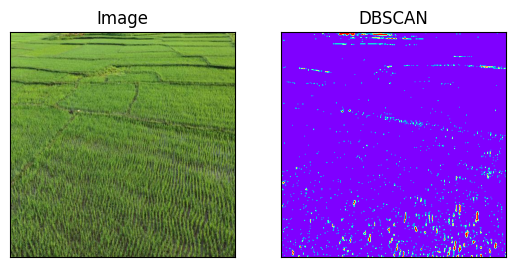

In [22]:
plt.subplot(1,2,1)
plt.imshow(I)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('Image')



plt.subplot(1,2,2)
plt.imshow(L,cmap='rainbow_r') 
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('DBSCAN');

